# Pandas Visualization Notes

The pandas library has become popular for not just for enabling powerful data analysis, but also for its handy pre-canned plotting methods. Interestingly though, pandas plotting methods are really just convenient wrappers around existing matplotlib calls.

That is, the `plot()` method on pandas’ Series and DataFrame is a wrapper around `plt.plot()`. One convenience provided, for example, is that if the DataFrame’s Index consists of dates, `gcf().autofmt_xdate()` is called internally by pandas to get the current Figure and nicely auto-format the x-axis.

In turn, remember that plt.plot() (the state-based approach) is implicitly aware of the current Figure and current Axes, so pandas is following the state-based approach by extension.

## Documentation, guides and tutorials
[Introduction to Data Visualization with Pandas](https://towardsdatascience.com/plotting-with-pandas-an-introduction-to-data-visualization-8bd7c0831650)

## 1. Plotting in Pandas

We can prove this “chain” of function calls with a bit of introspection. First, let’s construct a plain-vanilla pandas Series, assuming we’re starting out in a fresh interpreter session:

<class 'matplotlib.axes._subplots.AxesSubplot'>


True

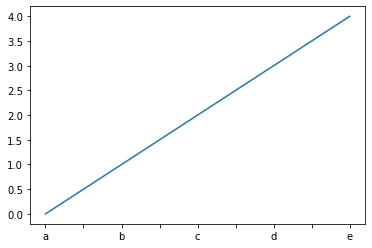

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series(np.arange(5), index=list("abcde"))
ax = s.plot()

print(type(ax))
id(plt.gca()) == id(ax)

This internal architecture is helpful to know when you are mixing pandas plotting methods with traditional matplotlib calls, which is done below in plotting the moving average of a widely watched financial time series. ma is a pandas Series for which we can call ma.plot() (the pandas method), and then customize by retrieving the Axes that is created by this call (plt.gca()), for matplotlib to reference:

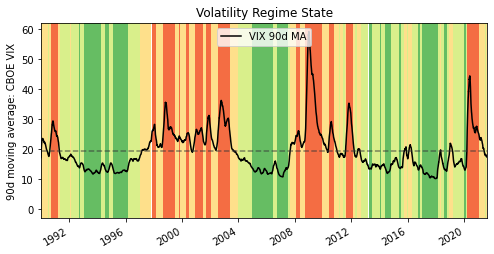

In [8]:
import matplotlib.transforms as mtransforms

url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS"
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values=".",
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling("90d").mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

cmap = plt.get_cmap('RdYlGn_r') # reversed by _r
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')

# Get the current Axes that ma.plot() references
ax = plt.gca()  
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')

## 2. Introduction to Pandas Data Visualization

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
weather = pd.read_csv("https://raw.githubusercontent.com/alanjones2/dataviz/master/london2018.csv")
weather.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3


## 3. Playground: Gapminder Dataset

In [14]:
# Set the url for the data source
popDataURL = "https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv"

# Read the data into a pandas dataframe 
popData = pd.read_csv(popDataURL, 
    delimiter = '\t',
    dtype = {'year': int})

popData["pop"] = popData["pop"]/1000000

In [11]:
popData

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8.425333,779.445314
1,Afghanistan,Asia,1957,30.332,9.240934,820.853030
2,Afghanistan,Asia,1962,31.997,10.267083,853.100710
3,Afghanistan,Asia,1967,34.020,11.537966,836.197138
4,Afghanistan,Asia,1972,36.088,13.079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9.216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10.704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11.404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11.926563,672.038623


In [12]:
# Subset the data into subsets for the countries Spain, the UK, India, and the US
popDataSpain = popData[popData["country"] == "Spain"]
popDataUK = popData[popData["country"] == "United Kingdom"]
popDataIndia = popData[popData["country"] == "India"]
popDataUS = popData[popData["country"] == "United States"]

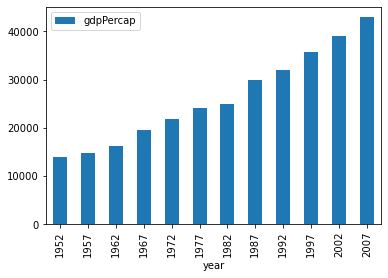

In [13]:
# Create a bar plot with the GPD per Capita for popDataUS
popDataUS.plot(kind = "bar", x = "year", y = "gdpPercap")
plt.show()
